In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
rent_f = pd.read_csv('rent100riel_new.csv')
rent_f.head()

,district,metro,area,rooms,floor,gk,price,adress
0,2.87,3,118.0,3,4,0,67900,"\nул. Старонаводницкая, 6б, Киев\n"
1,1.19,1,85.0,2,4,0,40800,"\nул. Липкивского Василия (Урицкого), 18, Киев\n"
2,1.74,3,90.0,3,4,0,19000,"\nул. Дмитриевская, 82, Киев\n"
3,1.53,3,228.0,7,4,0,163000,"\nТолстого Льва пл., 11, Киев\n"
4,1.53,3,39.0,1,3,0,14900,"\nул. Дубинина Володи, 7/14, Киев\n"


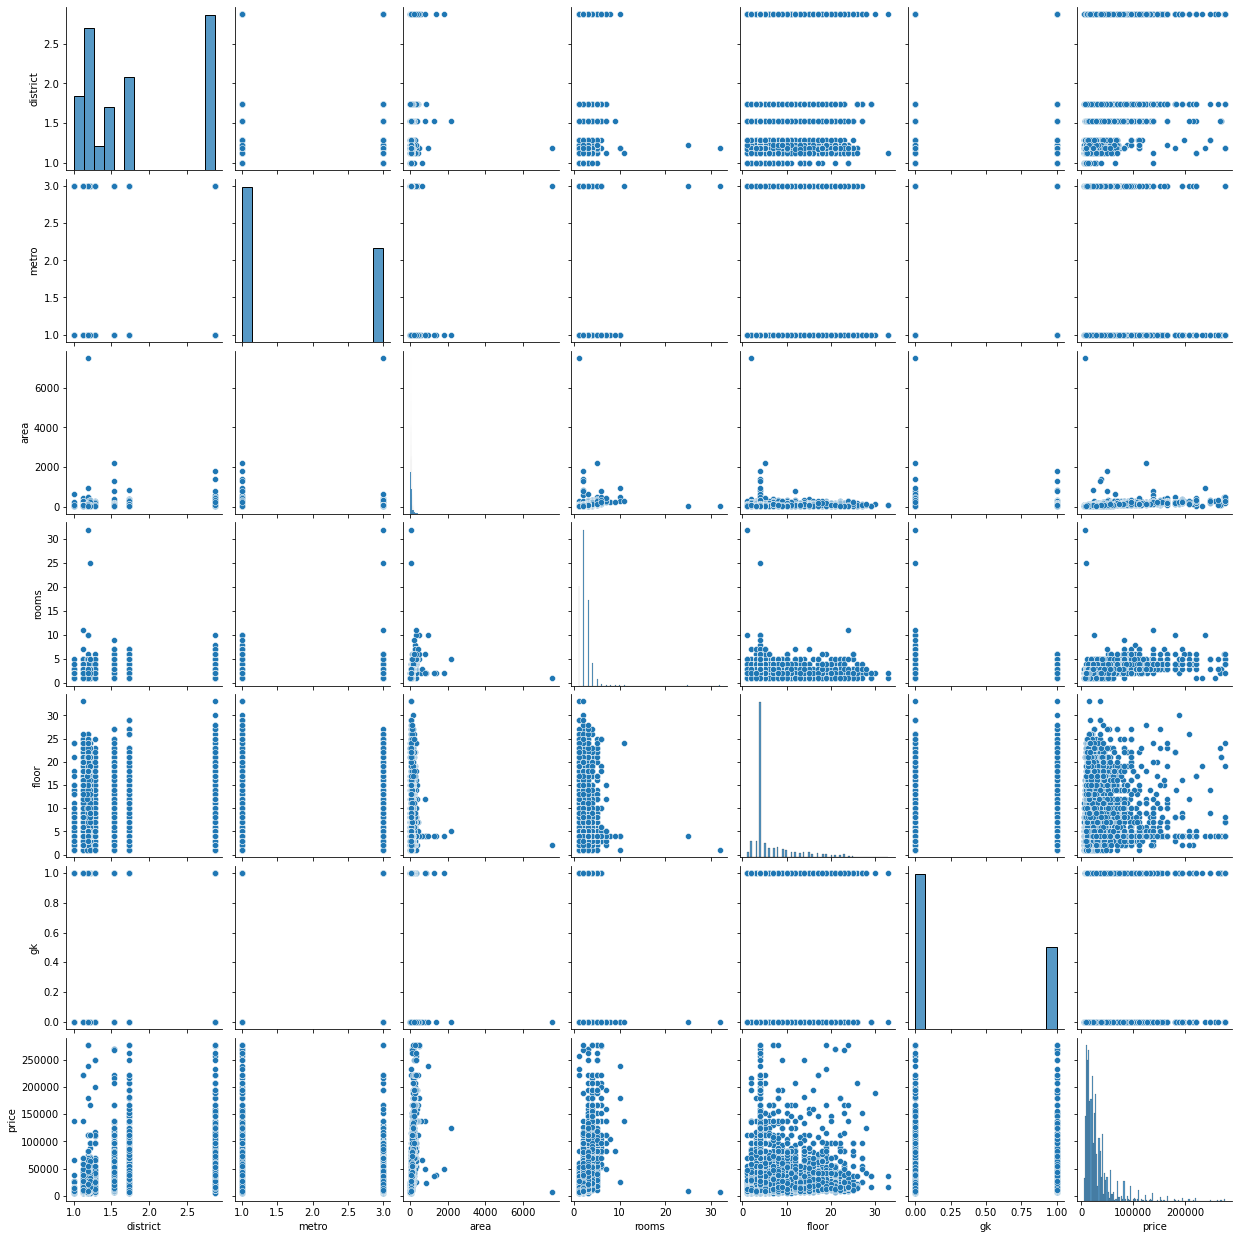

In [32]:
sns.pairplot(rent_f)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

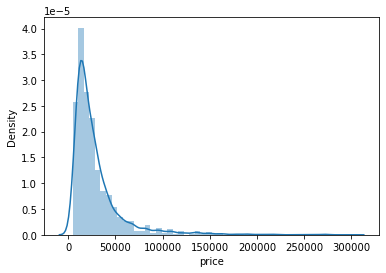

In [4]:
sns.distplot(rent_f['price'])

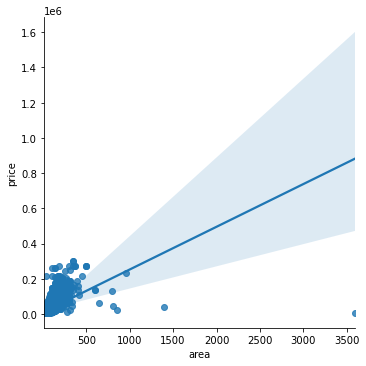

In [5]:
sns.lmplot(x='area', y='price', data=rent_f)

In [20]:
X = rent_f[['district', 'metro', 'area',
               'rooms', 'floor', 'gk']]
y = rent_f['price']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [29]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
lm.coef_

array([8291.08255442, 2032.16522787,  130.29317912, 9921.17650507,
        194.92936853, 7949.80992781])

In [31]:
lm.score(X_train,y_train)

0.47377669556626156

In [32]:
lm.score(X_test, y_test)

0.551301920927628

In [33]:
predictions = lm.predict(np.array([1.18, 3, 46, 1, 12, 1]).reshape(1, -1))
predictions

array([17283.19276216])

In [13]:
predictions = lm.predict(X_test)

In [14]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 11495.007676469244
MSE: 364773021.53851676
RMSE: 19099.031952916273


In [34]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor()
model_3.fit(X_train, y_train)
print(model_3.score(X_train, y_train))



0.9233337989308511


In [35]:
model_3.score(X_test, y_test)

0.6824238738201598

In [41]:
predict = model_3.predict(np.array([1.22, 1, 44, 1, 16, 1]).reshape(1, -1))
predict

array([11827.])

In [37]:
import pickle

with open(r'Alena_model_random_forest.pickle', 'wb') as f:
    pickle.dump(model_3, f)